In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


In [ ]:
df = pd.read_csv('retail_sales_dataset.csv')

print(df.head())
print(df.info())
print(df.describe())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [ ]:
# features for clustering
print(df.columns)

features = df[['Transaction ID', 'Quantity', 'Customer ID', 'Price per Unit']]


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import LabelEncoder


customer_data = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'count',
    'Age': 'mean',
    'Gender': 'first'
}).rename(columns={'Transaction ID': 'Frequency', 'Total Amount': 'Total_Spend'})


customer_data['Avg_Purchase_Value'] = customer_data['Total_Spend'] / customer_data['Frequency']


encoder = LabelEncoder()
customer_data['Gender'] = encoder.fit_transform(customer_data['Gender'])

print(customer_data.head())

             Total_Spend  Frequency   Age  Gender  Avg_Purchase_Value
Customer ID                                                          
CUST001              150          1  34.0       1               150.0
CUST002             1000          1  26.0       0              1000.0
CUST003               30          1  50.0       1                30.0
CUST004              500          1  37.0       1               500.0
CUST005              100          1  30.0       1               100.0


In [ ]:

customer_data = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'count',
    'Age': 'mean',
    'Gender': 'first'
}).rename(columns={'Transaction ID': 'Frequency', 'Total Amount': 'Total_Spend'})

customer_data['Avg_Purchase_Value'] = customer_data['Total_Spend'] / customer_data['Frequency']
encoder = LabelEncoder()
customer_data['Gender'] = encoder.fit_transform(customer_data['Gender'])

print(customer_data.head())


             Total_Spend  Frequency   Age  Gender  Avg_Purchase_Value
Customer ID                                                          
CUST001              150          1  34.0       1               150.0
CUST002             1000          1  26.0       0              1000.0
CUST003               30          1  50.0       1                30.0
CUST004              500          1  37.0       1               500.0
CUST005              100          1  30.0       1               100.0


In [ ]:
# Standardize the data
scaler = StandardScaler()
features = scaler.fit_transform(customer_data[['Total_Spend', 'Frequency', 'Age', 'Avg_Purchase_Value']])


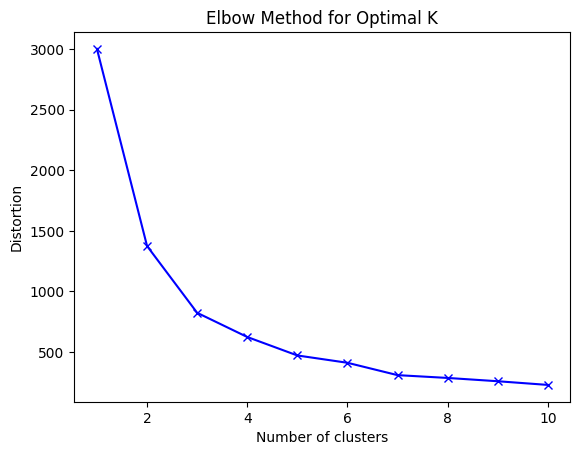

In [ ]:
# k means
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
#  K-Means with optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features)

# clustering
silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f"Silhouette Score for K-Means: {silhouette_avg}")


Silhouette Score for K-Means: 0.4883744900970183


In [ ]:
#  DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features)

# DBSCAN cluster labels
customer_data['DBSCAN_Cluster'] = dbscan_labels
print(customer_data['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
0    650
1    111
2     86
5     54
3     50
4     49
Name: count, dtype: int64


In [ ]:
# Analyze clusters
kmeans_summary = customer_data.groupby('Cluster').mean()
print(kmeans_summary)


         Total_Spend  Frequency        Age    Gender  Avg_Purchase_Value  \
Cluster                                                                    
0         154.147287        1.0  53.074935  0.478036          154.147287   
1        1297.727273        1.0  40.140152  0.477273         1297.727273   
2         153.997135        1.0  29.383954  0.512894          153.997135   

         DBSCAN_Cluster  
Cluster                  
0              0.227390  
1              2.753788  
2              0.240688  


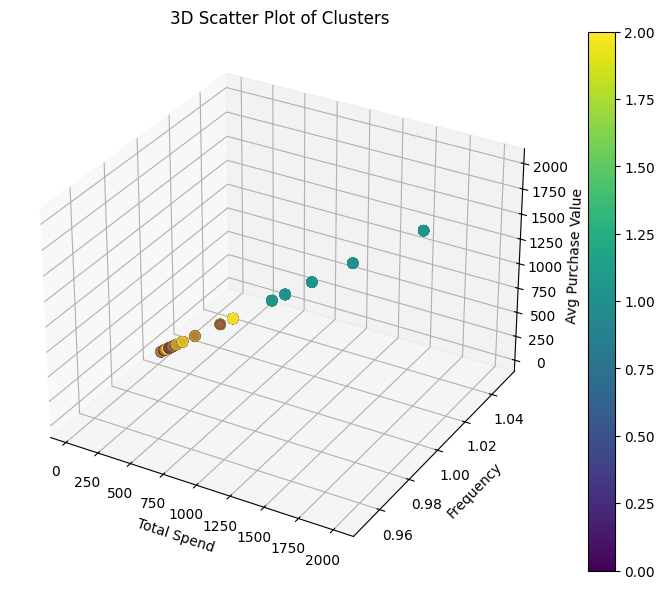

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    customer_data['Total_Spend'],
    customer_data['Frequency'],
    customer_data['Avg_Purchase_Value'],
    c=customer_data['Cluster'],
    cmap='viridis',
    s=50
)
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Total Spend')
ax.set_ylabel('Frequency')
ax.set_zlabel('Avg Purchase Value')
plt.colorbar(scatter)
plt.show()


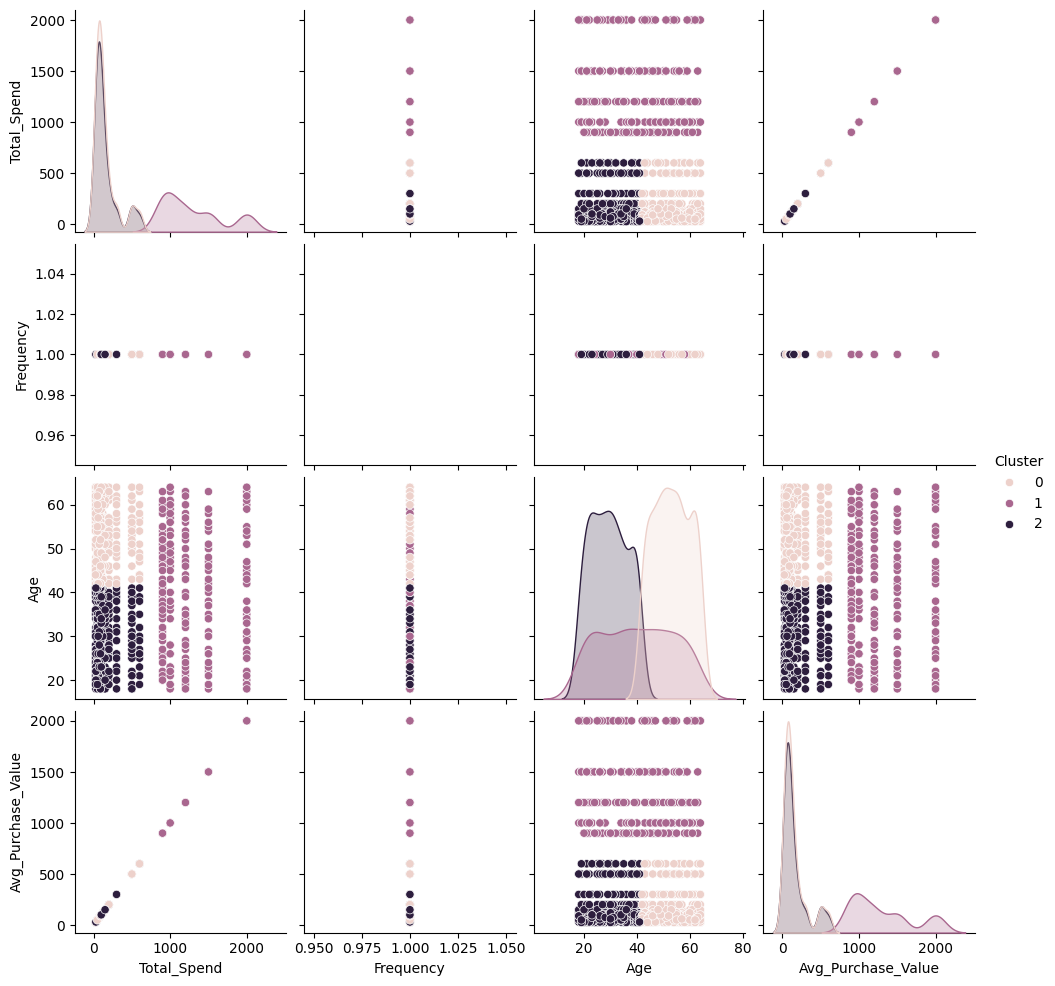

In [ ]:
# Pairplot visualization
sns.pairplot(customer_data, hue='Cluster', vars=['Total_Spend', 'Frequency', 'Age', 'Avg_Purchase_Value'])
plt.show()


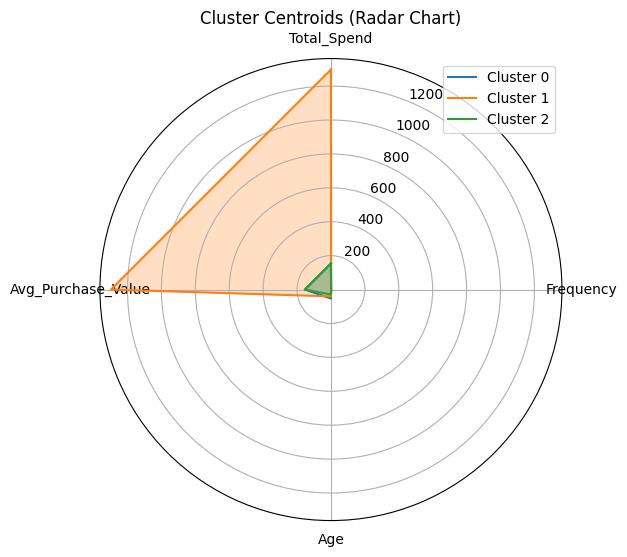

In [ ]:
import numpy as np

# Calculate centroids
centroids = customer_data.groupby('Cluster').mean()[['Total_Spend', 'Frequency', 'Age', 'Avg_Purchase_Value']]

# Radar chart
labels = centroids.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i, row in centroids.iterrows():
    data = row.values.flatten().tolist()
    data += data[:1]
    ax.plot(angles, data, label=f'Cluster {i}')
    ax.fill(angles, data, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend()
plt.title('Cluster Centroids (Radar Chart)')
plt.show()


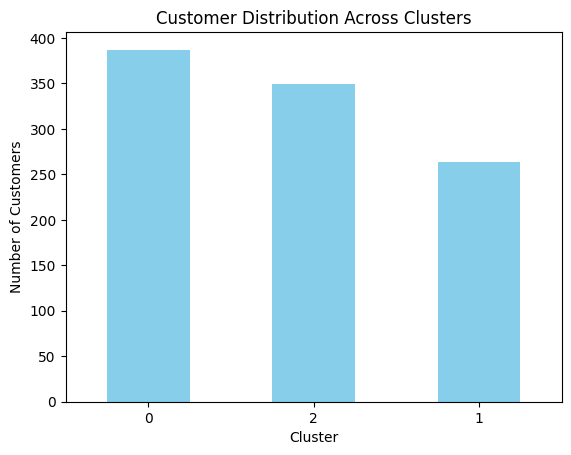

In [ ]:
cluster_counts = customer_data['Cluster'].value_counts()

# Bar plot
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


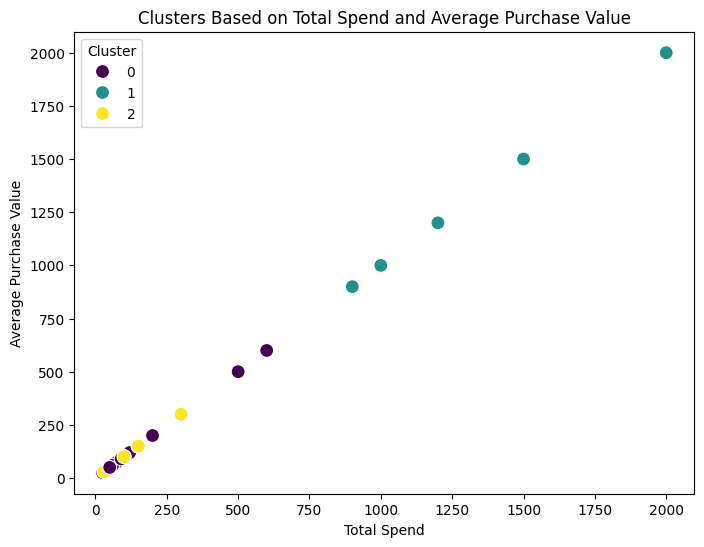

In [ ]:
# Scatter plot for two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Spend', y='Avg_Purchase_Value', hue='Cluster', data=customer_data, palette='viridis', s=100)
plt.title('Clusters Based on Total Spend and Average Purchase Value')
plt.xlabel('Total Spend')
plt.ylabel('Average Purchase Value')
plt.legend(title='Cluster')
plt.show()


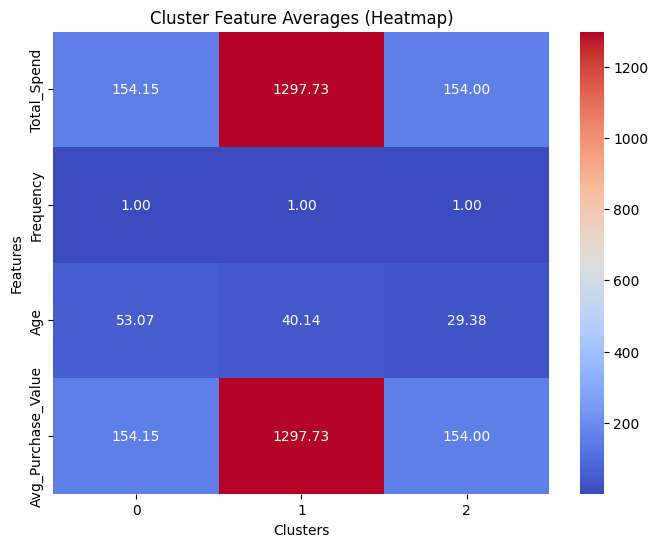

In [ ]:
# Average feature values per cluster
cluster_means = customer_data.groupby('Cluster').mean()[['Total_Spend', 'Frequency', 'Age', 'Avg_Purchase_Value']]

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Cluster Feature Averages (Heatmap)')
plt.ylabel('Features')
plt.xlabel('Clusters')
plt.show()


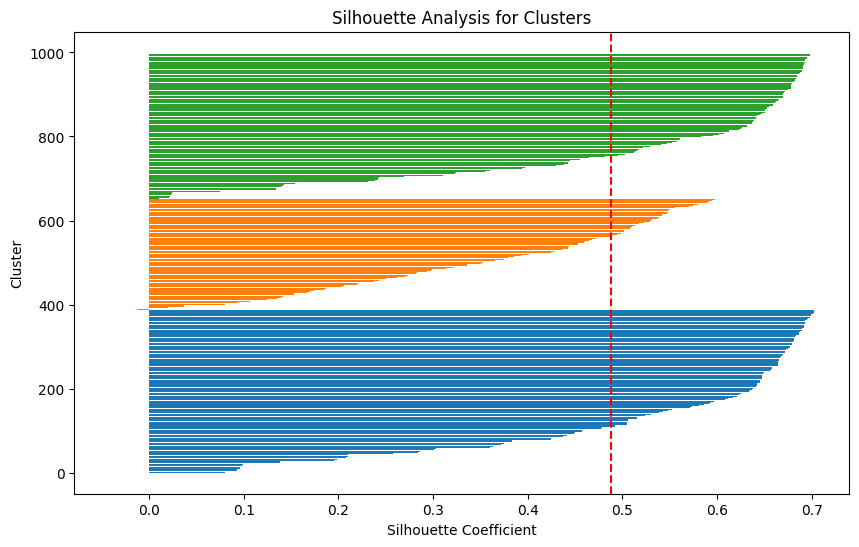

In [ ]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(features, customer_data['Cluster'])
cluster_labels = customer_data['Cluster']

# Silhouette plot
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(customer_data['Cluster'].nunique()):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none')
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
plt.title('Silhouette Analysis for Clusters')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.show()
